# **Import and Install Dependencies**

In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 1.6 MB/s 


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

# **Apply Selfie Segmentation**

In [ ]:
mp_selfie = mp.solutions.selfie_segmentation

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


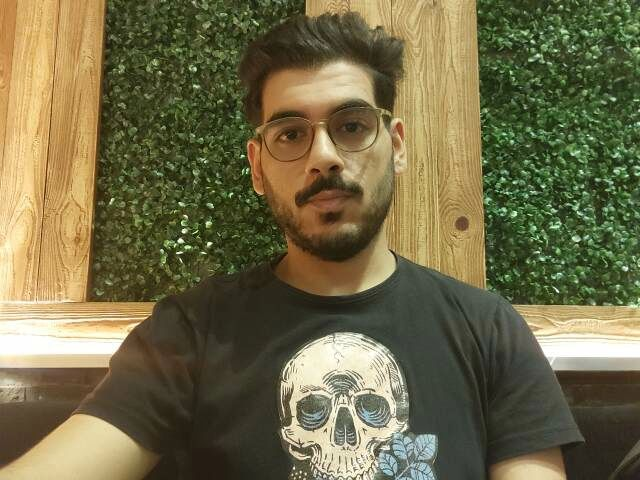

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
image = '/content/photo.jpg'

In [ ]:
img = cv2.imread(image)

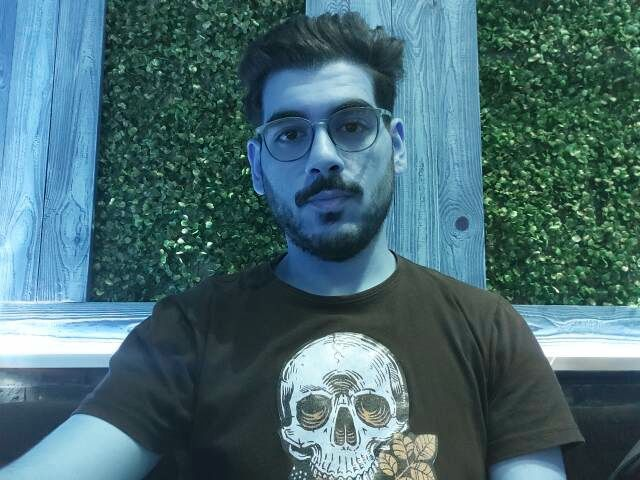

In [ ]:
with mp_selfie.SelfieSegmentation(model_selection=0) as model:

  frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  res = model.process(frame)

cv2_imshow(frame)

In [ ]:
res.segmentation_mask

array([[8.51885807e-27, 7.66697226e-27, 4.25942904e-27, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.90293321e-21, 2.61263987e-21, 1.45146660e-21, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.06368781e-21, 7.25731919e-21, 4.03184390e-21, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.22618127e-01, 8.40356290e-01, 9.11308765e-01, ...,
        1.41413463e-02, 3.72449355e-03, 1.12008164e-03],
       [8.10074508e-01, 8.29066992e-01, 9.05037105e-01, ...,
        2.33780257e-02, 8.27938411e-03, 4.50443523e-03],
       [8.03018570e-01, 8.22716653e-01, 9.01509166e-01, ...,
        2.85737906e-02, 1.08415745e-02, 6.40818244e-03]], dtype=float32)

# **Process Results**

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import gridspec

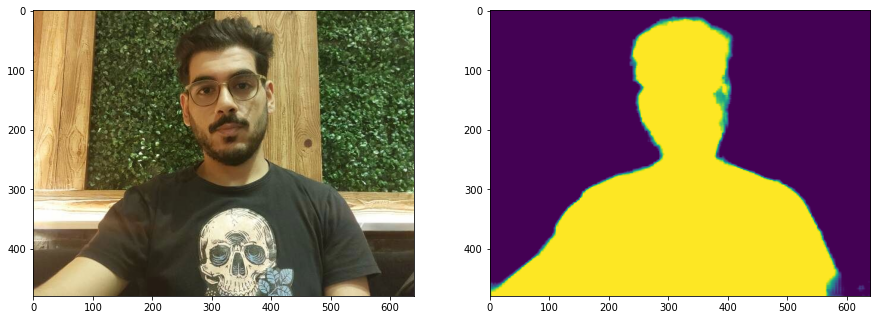

In [ ]:
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(frame)
ax1.imshow(res.segmentation_mask)
plt.show()

In [ ]:
background = np.zeros(frame.shape, dtype=np.uint8)
mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 

In [ ]:
segmented_image = np.where(mask, img, background)

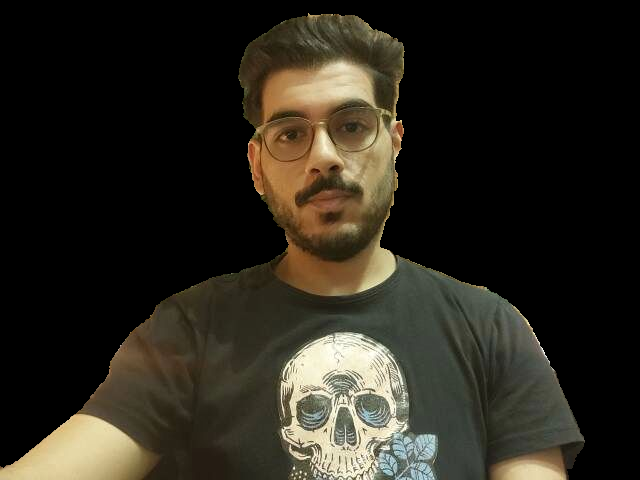

In [ ]:
cv2_imshow(segmented_image)

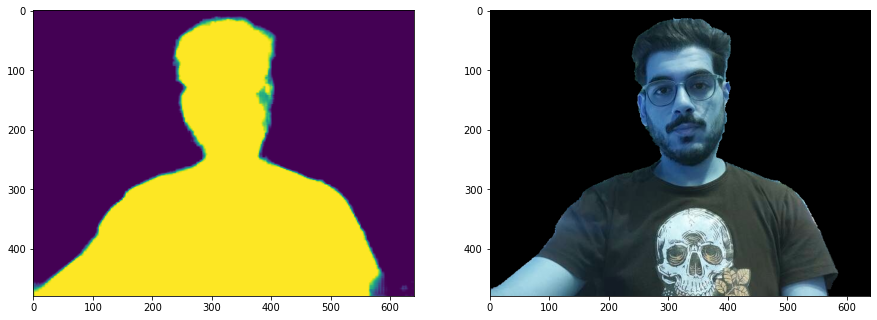

In [ ]:
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()

In [ ]:
segmented_image = np.where(mask, frame, cv2.blur(frame, (40,40)))

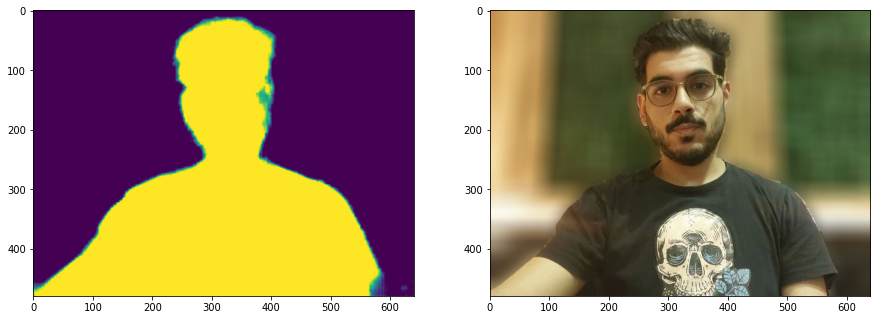

In [ ]:
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()